## xml 파일 불러오기 

In [1]:
from lxml import etree

In [8]:
tree=etree.parse("sample.xml")
root=tree.getroot()
tree

In [11]:
kids=root.getchildren()
kids

[<Element name at 0x19f4e6c28c8>,
 <Element members at 0x19f4e6c2748>,
 <Element albums at 0x19f4e6c26c8>]

In [20]:
members=[]
albums=[]
for child in kids:
#     print(child.text)
    if child.tag=="name":
        gname=child.text
    elif child.tag=="members":
        for xmember in child:
            members.append(xmember.text)
    elif child.tag=="albums":
        for xalbums in child:
            albums.append([xalbums.get("order"),xalbums.text])
    

In [16]:
print("걸그룹 : %s" %gname)

걸그룹 : 여자친구


In [18]:
for i, m in enumerate(members):
    print(m," ", end="")
for album in albums:
    print( "%s : %s" %(albums[0], albums[1]))

소원  예린  은하  유주  신비  엄지  ['EP 1집', 'Season of Glass'] : ['EP 2집', 'Flower Bud']
['EP 1집', 'Season of Glass'] : ['EP 2집', 'Flower Bud']
['EP 1집', 'Season of Glass'] : ['EP 2집', 'Flower Bud']
['EP 1집', 'Season of Glass'] : ['EP 2집', 'Flower Bud']


In [21]:
albums

[['EP 1집', 'Season of Glass'],
 ['EP 2집', 'Flower Bud'],
 ['EP 3집', 'Snowflake'],
 ['정규 1집', 'LOL']]

In [22]:
import json

In [26]:
path="usagov_bitly_data.txt"

records=[json.loads(line) for line in open(path, encoding="UTF-8")] #리스트로 묶어줌

In [33]:
records[0]

time_zones=[rec["tz"] for rec in records if "tz" in rec] #tz 컬럼이 있는 경우에만 time_zones에 저장 #요소가 없으면 ""로 출력
time_zones

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '',
 'America/Los_Angeles',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'Asia/Hong_Kong',
 'Asia/Hong_Kong',
 'America/New_York',
 'America/Denver',
 'Europe/Rome',
 'Africa/Ceuta',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'Europe/Madrid',
 'Asia/Kuala_Lumpur',
 'Asia/Nicosia',
 'America/Sao_Paulo',
 '',
 '',
 'Europe/London',
 'America/New_York',
 'Pacific/Honolulu',
 'America/Chicago',
 '',
 '',
 'Pacific/Honolulu',
 '',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/Chicago',
 'Europe/Rome',
 'America/New_York',
 'America/New_York',
 'America/Los_Angeles',
 '',
 '',
 'America/New_York',
 'America/New_York',
 'Europe/Malta',
 'America/New_York',
 'America/New_York',
 '',
 'America/Los_Angeles',
 'America/Sao_Paulo',
 '',
 'Asia/Hong_Kong',
 'Asia/Hong_Kong',
 'Paci

In [35]:
def get_counts(seq):
    counts={}
    for x in seq:
        if x in counts:
            counts[x]+=1
        else:
            counts[x]=1
    return counts
print(get_counts(time_zones))

{'America/New_York': 1251, 'America/Denver': 191, 'America/Sao_Paulo': 33, 'Europe/Warsaw': 16, '': 521, 'America/Los_Angeles': 382, 'Asia/Hong_Kong': 10, 'Europe/Rome': 27, 'Africa/Ceuta': 2, 'Europe/Madrid': 35, 'Asia/Kuala_Lumpur': 3, 'Asia/Nicosia': 1, 'Europe/London': 74, 'Pacific/Honolulu': 36, 'America/Chicago': 400, 'Europe/Malta': 2, 'Europe/Lisbon': 8, 'Europe/Paris': 14, 'Europe/Copenhagen': 5, 'America/Mazatlan': 1, 'Europe/Dublin': 3, 'Europe/Brussels': 4, 'America/Vancouver': 12, 'Europe/Amsterdam': 22, 'Europe/Prague': 10, 'Europe/Stockholm': 14, 'America/Anchorage': 5, 'Asia/Bangkok': 6, 'Europe/Berlin': 28, 'America/Rainy_River': 25, 'Europe/Budapest': 5, 'Asia/Tokyo': 37, 'Europe/Vienna': 6, 'America/Phoenix': 20, 'Asia/Jerusalem': 3, 'Asia/Karachi': 3, 'America/Bogota': 3, 'America/Indianapolis': 20, 'America/Montreal': 9, 'Asia/Calcutta': 9, 'Europe/Skopje': 1, 'Asia/Beirut': 4, 'Australia/NSW': 6, 'Chile/Continental': 6, 'America/Halifax': 4, 'America/Edmonton': 6,

### defaultdict 

In [36]:
from collections import defaultdict #defaultdict: 키를 자동으로 카운트

In [38]:
def get_counts2(seq):
    counts=defaultdict(int)
    for x in seq:
        counts[x]+=1
    return counts
counts=get_counts(time_zones)
#print(counts) 

In [54]:
#가장 많이 등장하는 상위 10개의 표준시간대를 출력하는 함수 작성
def top_counts(count_dict, n=10):
    #print(count_dict.items())
    pairs=[(count, tz) for tz,count in count_dict.items()]
    pairs.sort()
    print(pairs[-n:])
top_counts(counts)

[(33, 'America/Sao_Paulo'), (35, 'Europe/Madrid'), (36, 'Pacific/Honolulu'), (37, 'Asia/Tokyo'), (74, 'Europe/London'), (191, 'America/Denver'), (382, 'America/Los_Angeles'), (400, 'America/Chicago'), (521, ''), (1251, 'America/New_York')]


### Counter 

In [48]:
from collections import Counter

In [51]:
counts=Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [62]:
mylist=["a","c","d","a","b"]
myDict={"다":3,"나":1,"가":5}
print(Counter(mylist))
print(Counter(myDict))

Counter({'a': 2, 'c': 1, 'd': 1, 'b': 1})
Counter({'가': 5, '다': 3, '나': 1})


In [59]:
c=Counter(a=3,b=2,c=5) #값에 대한 내림차순(큰값부터 정렬)
print(c)
print(sorted(c.elements()))

Counter({'c': 5, 'a': 3, 'b': 2})
['a', 'a', 'a', 'b', 'b', 'c', 'c', 'c', 'c', 'c']


In [64]:
from pandas import DataFrame, Series
import pandas as pd

In [68]:
frame=DataFrame(records)
frame

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN


In [72]:
ctz=frame["tz"].fillna("missing")
ctz[ctz==""]="Unknown"

In [76]:
tzc=ctz.value_counts()
tzc

America/New_York         1251
Unknown                   521
America/Chicago           400
America/Los_Angeles       382
America/Denver            191
                         ... 
America/Santo_Domingo       1
Europe/Ljubljana            1
Asia/Nicosia                1
Europe/Skopje               1
Africa/Lusaka               1
Name: tz, Length: 98, dtype: int64

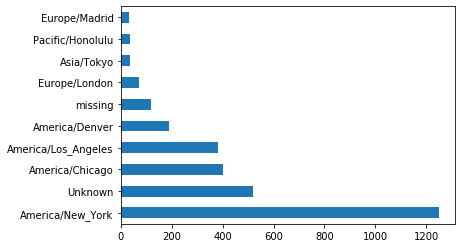

In [77]:
tzc[:10].plot(kind="barh")

In [88]:
#정규식 사용해서 컴퓨터 운영체제() 추출
frame["a"]

120

In [85]:
res=Series([x.split()[0]for x in frame.a.dropna()]) #a컬럼에 있는 운영체제 명을 추출(결측값은 제거)
res.value_counts()

Mozilla/5.0                                          2161
Mozilla/4.0                                           556
Unknown                                               521
GoogleMaps/RochesterNY                                121
TEST_INTERNET_AGENT                                    24
GoogleProducer                                         17
Opera/9.80                                             15
Mozilla/6.0                                             5
Dalvik/1.4.0                                            3
Goldfire                                                2
Socialite/7766                                          2
HTTP_Request2/2.0.0                                     1
ICE                                                     1
sometrik.com                                            1
BlackBerry9300/5.0.0.997                                1
BlackBerry9700/5.0.0.423                                1
LG-LG220C[TF268435458416597116000000013524223841]       1
NokiaC3-00/5.0

In [96]:
import numpy as np
cframe=frame[frame.a.notnull()]
cframe

myOs=np.where(cframe.a.str.contains("Windows"),"Windows","Not Windows") #contains함수: 문자열만 참조
myOs

array(['Windows', 'Not Windows', 'Windows', ..., 'Not Windows',
       'Not Windows', 'Windows'], dtype='<U11')

In [102]:
#time zone과 myOs에 따른 그룹화
tzos=cframe.groupby(["tz", myOs])
tzos.size().unstack().fillna(0)

,Not Windows,Windows
tz,,
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
...,...,...
Europe/Warsaw,1.0,15.0
Europe/Zurich,4.0,0.0
Pacific/Auckland,3.0,8.0


In [ ]:
진수는 어린 동욱이에게 숫자 공부를 시키고 있다.
진수는 숫자를 여러 번 말한다.
그러면 동욱이는 진수가 부르는 숫자를 공책에 적거나 지운다.
숫자를 적을 때는 공책에 그 숫자가 적혀 있지 않을 때이고,
숫자를 지울 때는 공책에 그 숫자가 적혀 있을 때이다.
처음 공책에는 어떤 숫자도 적혀 있지 않다고 할 때,
마지막에 공책에 적힌 숫자의 개수를 구하는 프로그램을 작성하라.

[입력]

첫 번째 줄에 테스트 케이스의 수 T가 주어진다.
각 테스트 케이스의 첫 번째 줄에는 ‘0’에서 ‘9’사이의 숫자로 이루어진 길이 1이상 104이하의 문자열이 주어진다.

문자열은 진수가 말하는 숫자를 순서대로 나타낸다.

[출력]
각 테스트 케이스마다 ‘#x’(x는 테스트케이스 번호를 의미하며 1부터 시작한다)를 출력하고,
각 테스트 케이스 마다 마지막에 공책에 적힌 숫자의 개수를 출력한다.

입력
3
121
0123456789
555555

// 테스트 케이스 개수
// 첫 번째 테스트 케이스 문자열
// 두 번째 테스트 케이스 문자열
 
sample_input.txt
출력
#1 1
#2 10
#3 0

In [203]:
from collections import Counter

n=int(input())
for _ in range(n):
    num_list=list(str(input()))
    n_list=Counter(num_list)
    list_zip=list(zip(n_list.keys(), n_list.values())) 
    cnt=0
    for i in range(len(list_zip)):
        if list_zip[i][1]%2!=0:
            cnt+=1
        else:
            pass
    print(cnt)

3
5555
0
23
2
1234
4


In [191]:
num_list=list(str(1122333))
n_list=Counter(num_list)
list_zip=list(zip(n_list.keys(), n_list.values()))
list_zip[2][1]

3